In [578]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
import seaborn as sns
%matplotlib inline

### Generate Data using normal distribution

In [579]:
def generate_data():
    predictor = []
    response = []
    for i in range(100):
        x = 1+(0.1732*(2*np.random.uniform(0, 1, 1)-1))
        predictor.append(x)
        response.append(1.3*(x**2)+4.8*x+8+np.random.random(1))
    data = pd.DataFrame(data={'bias':1,'X':predictor,'Y':response})
    return data
d1 = generate_data()
d2 =  pd.read_csv(r'D:\Exercises\ML Lab\winequality-red.csv', sep=';')

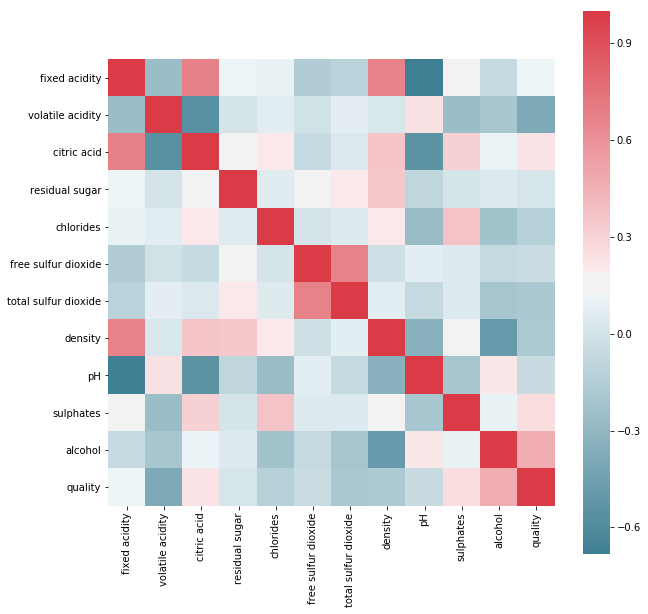

In [580]:
f, ax = plt.subplots(figsize=(10, 10))
corr = d2.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#### Since we are working on regularization a better idea is to take more features to have meaningful results, hence we remove only highly correlated features such as citric acid and free sulfur dioxide
- Replace the unknown values of the data
- Select only few relevant features 
- perform normalization
- insert bias column


In [611]:
d2.replace(["unknown"],np.nan,inplace=True)
d2.dropna(inplace=True)
d2 = d2[['pH','fixed acidity','volatile acidity','residual sugar','chlorides','total sulfur dioxide','density','alcohol','sulphates','quality']]
d2 = (d2-d2.min())/(d2.max()-d2.min())
d2.insert(0,'Bias',np.ones(1599))

### Defining methods for Least Square, Lasso and Ridge regression

In [612]:
def run_linear(train,test,col_name,learningrate):
    '''
    Least Sqaure Regression with learning rate as hyperparameter
    '''
    rgr = linear_model.SGDRegressor(loss='squared_loss',penalty='none',
                                    fit_intercept=True,tol=1e-2,shuffle=True,
                                    eta0=learningrate,learning_rate='constant') #least square measure
    rgr.fit(train.drop(col_name, axis=1),train[col_name])
    y_pred_rgr_test = rgr.predict(test.drop(col_name, axis=1))
    y_pred_rgr_train = rgr.predict(train.drop(col_name, axis=1))
    train_error = np.sqrt(mean_squared_error(train[col_name], y_pred_rgr_train))
    test_error = np.sqrt(mean_squared_error(test[col_name], y_pred_rgr_test))
    return train_error,test_error

def run_ridge(train,test,col_name,learningrate,reg):
    '''
    Ridge regression (L1 regularization) using alpha and learning rate as hyperparameter
    '''
    rgr = linear_model.SGDRegressor(loss='squared_loss',penalty='l1',
                                    alpha=reg,fit_intercept=True,tol=1e-7,shuffle=True,
                                    eta0=learningrate,learning_rate='constant',max_iter=5000) #least square measure
    rgr.fit(train.drop(col_name, axis=1),train[col_name])
    y_pred_rgr_test = rgr.predict(test.drop(col_name, axis=1))
    y_pred_rgr_train = rgr.predict(train.drop(col_name, axis=1))
    train_error = np.sqrt(mean_squared_error(train[col_name], y_pred_rgr_train))
    test_error = np.sqrt(mean_squared_error(test[col_name], y_pred_rgr_test))
    return train_error,test_error

def run_lasso(train,test,col_name,learningrate,reg):
    '''
    Lasso Regularization using alpha and learning rate as hyperparameter
    '''
    rgr = linear_model.SGDRegressor(loss='squared_loss',penalty='l2',
                                    alpha=reg,fit_intercept=True,tol=1e-7,shuffle=True,
                                    eta0=learningrate,learning_rate='constant',max_iter=5000) #least square measure
    rgr.fit(train.drop(col_name, axis=1),train[col_name])
    y_pred_rgr_test = rgr.predict(test.drop(col_name, axis=1))
    y_pred_rgr_train = rgr.predict(train.drop(col_name, axis=1))
    train_error = np.sqrt(mean_squared_error(train[col_name], y_pred_rgr_train))
    test_error = np.sqrt(mean_squared_error(test[col_name], y_pred_rgr_test))
    return train_error,test_error

def run_elastic(train,test,col_name,learningrate,reg):
    '''
    Lasso Regularization using alpha and learning rate as hyperparameter
    '''
    rgr = linear_model.SGDRegressor(loss='squared_loss',penalty='elasticnet',
                                    l1_ratio =reg,fit_intercept=True,tol=1e-7,shuffle=True,
                                    eta0=learningrate,learning_rate='constant',max_iter=5000) #least square measure
    rgr.fit(train.drop(col_name, axis=1),train[col_name])
    y_pred_rgr_test = rgr.predict(test.drop(col_name, axis=1))
    y_pred_rgr_train = rgr.predict(train.drop(col_name, axis=1))
    train_error = np.sqrt(mean_squared_error(train[col_name], y_pred_rgr_train))
    test_error = np.sqrt(mean_squared_error(test[col_name], y_pred_rgr_test))
    return train_error,test_error

### Least Square Hyperparameter 

Test score with learning rates [0.01 0.21 0.41 0.61] is [0.14276910259995043, 0.13709414457750227, 0.1619381321069064, 0.8573550403503044] respectively


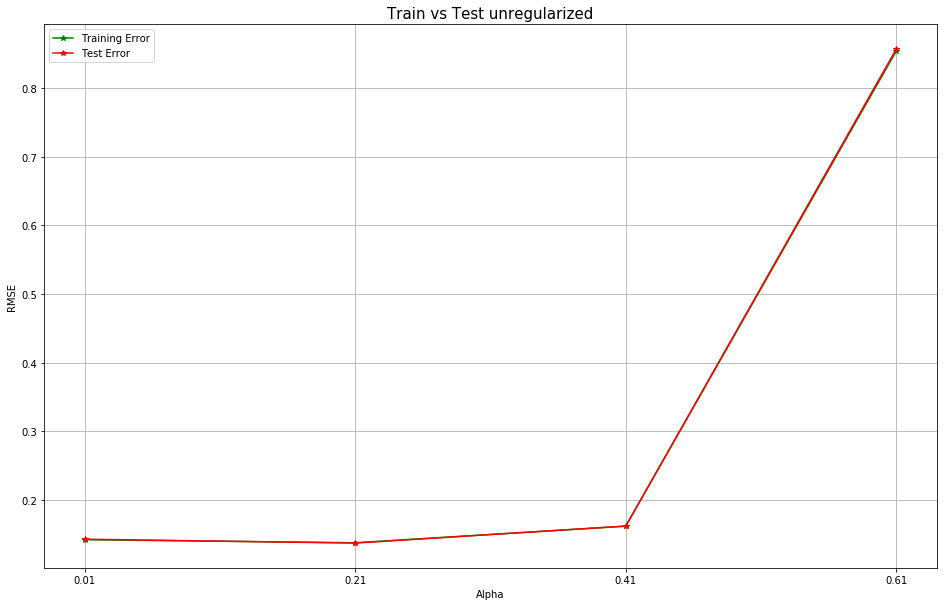

In [614]:
'''
Create samples, create range of hyperparameters, run the loop for the same
plot the RMSE across for test and train data
'''
train_d2= d2.sample(frac=0.8)
test_d2=d2.sample(frac=0.2)
train_rmse,test_rmse = [],[]
h_p = np.arange(0.01, 0.8, 0.20)
#run the least square using different parameters
for l_r in list(h_p):
    tr_er,ts_er = run_linear(train_d2,test_d2,'quality',l_r)
    train_rmse.append(tr_er)
    test_rmse.append(ts_er)
print(f"Test score with learning rates {h_p} is {test_rmse} respectively")
fig, ax = plt.subplots(figsize=(16,10))
ax.plot(np.array(h_p),np.array(train_rmse),'-g*')
ax.plot(np.array(h_p),np.array(test_rmse),'-r*')
ax.grid()
ax.set_xticks(h_p)
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSE')
ax.set_title("Train vs Test unregularized", fontsize = 15)
ax.legend(["Training Error","Test Error"])
#ax.legend['Training','Test']

#### Without any regularization we can observe that the RMSE increases as the error increases since we are bound to overstep and miss the optimal solution due to bigger step size.

### L1 regularization using Hyperparameter

In [615]:
train_d2= d2.sample(frac=0.8)
test_d2=d2.sample(frac=0.2)

Test score with learning rates 0.01 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [0.16452321852415167, 0.1697232954055493, 0.17268777676219937, 0.1717566872565519, 0.172360562697169, 0.17300156311732204, 0.17468342273484053, 0.1734090504066641, 0.17405032578862512] respectively
Test score with learning rates 0.3 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [0.16311847518196876, 0.2067973859471048, 0.18203761091623546, 0.20310561523066079, 0.18422637143343362, 0.17937447107907376, 0.18213265361483172, 0.26859212963933, 0.20141323756107252] respectively
Test score with learning rates 0.8 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [949500961411.1743, 1144390010160.66, 1349938471327.3506, 1204961242857.8765, 1158549810187.619, 1276496014615.038, 1388430325822.1155, 1876904716006.2148, 1412951217848.3777] respectively


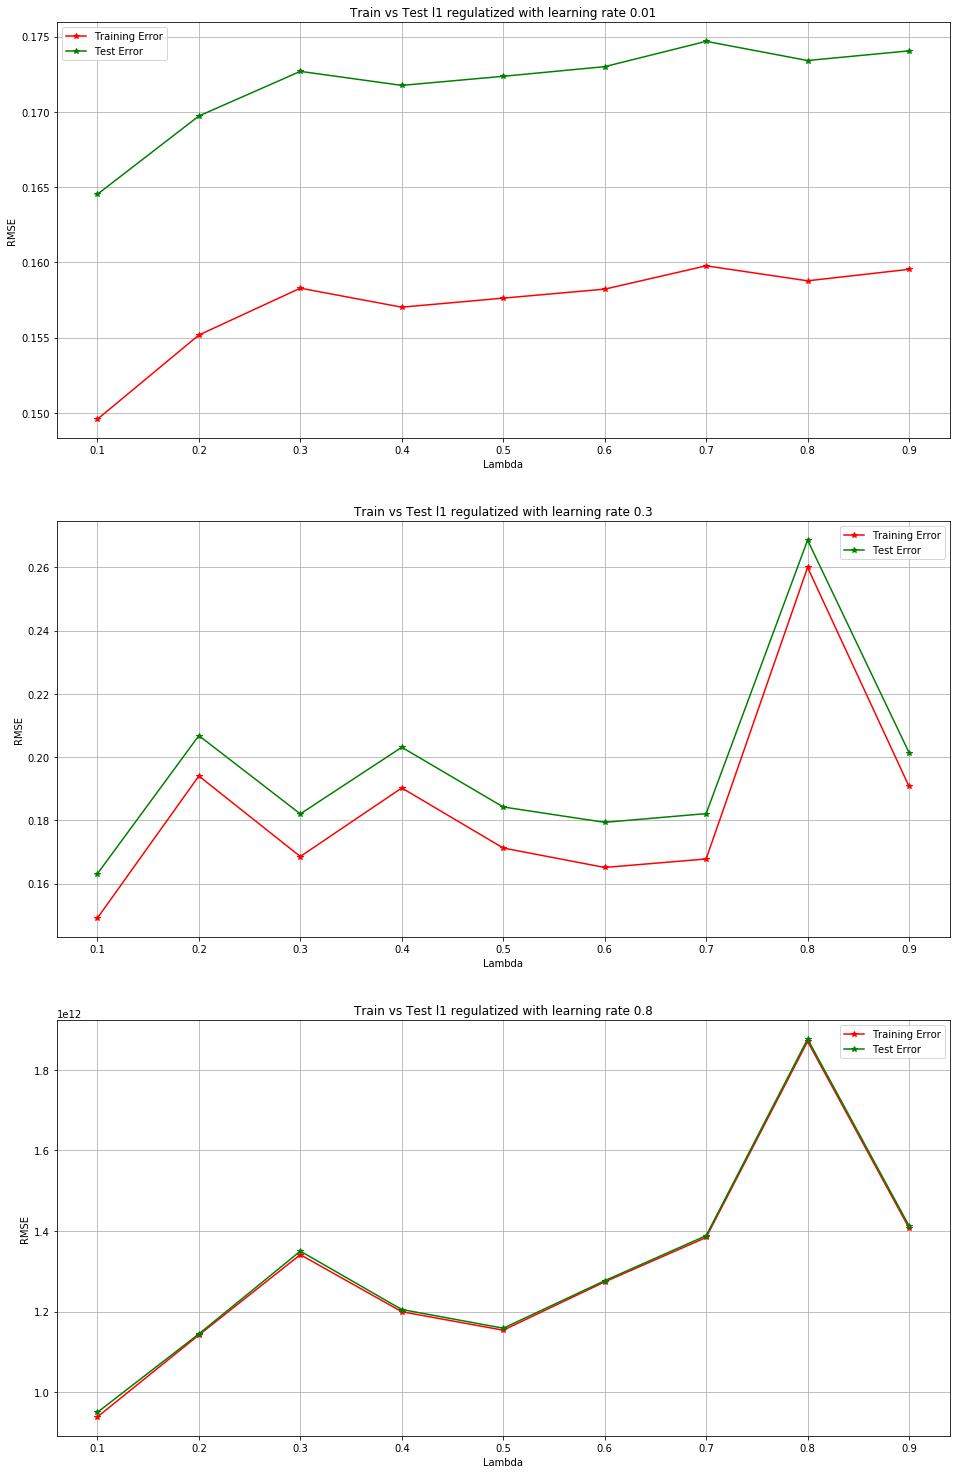

In [618]:
'''
Create samples, create range of hyperparameters, run the loop for the same
plot the RMSE across for test and train data
'''

train_rmse,test_rmse = [],[]
h_p = (0.01, 0.3, 0.8)
alp = np.arange(0.1, 1, 0.10)
fig,ax = plt.subplots(3,1,figsize=(16,26))
lr_i = 0
for l_r in h_p:
    train_rmse,test_rmse = [],[]
    for ap in alp:
        tr_er,ts_er = run_lasso(train_d2,test_d2,'quality',l_r,ap)
        train_rmse.append(tr_er)
        test_rmse.append(ts_er)
    print(f"Test score with learning rates {l_r} and alpha {alp} is {test_rmse} respectively")
    ax[lr_i].plot(np.array(alp).T,np.array(train_rmse),'-r*')
    ax[lr_i].plot(np.array(alp).T,np.array(test_rmse),'-g*')
    ax[lr_i].grid()
    ax[lr_i].set_xticks(alp)
    ax[lr_i].set_xlabel('Lambda')
    ax[lr_i].set_ylabel('RMSE')
    ax[lr_i].set_title(f"Train vs Test l1 regulatized with learning rate {np.around(l_r,decimals=2)}")
    ax[lr_i].legend(["Training Error","Test Error"])
    lr_i +=1
#fig.legend['Training','Test']

#### Using L1 regualrization, the error value increases as we increase our lambda value, indicating that the model switches from being overfit to underfit, as we move the regualrization from 0.1 to 0.9
#### Also, the error scale on the y axis increases as we increase the learning rate, thus the regularized model does not affect the performance due to the choice of the learning rate

### L2 Regularizer using Hyperparameter

Test score with learning rates 0.01 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [0.1758980053676719, 0.17553065594121792, 0.17554445850851533, 0.17560424794635546, 0.17573312653347248, 0.17556448828245574, 0.17563105322061331, 0.17561783270031708, 0.175716739791046] respectively
Test score with learning rates 0.6 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [0.20742460583924094, 0.17665468794651767, 0.21045616862793773, 0.21865337030679394, 0.1771560961857802, 0.19780693926248755, 0.1861470069386877, 0.17782395612441818, 0.30332961266302944] respectively
Test score with learning rates 0.9 and alpha [0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] is [0.20527610316505726, 0.18357144026281713, 0.1972895161982762, 0.1845681142108496, 0.2183390929892106, 0.21506819432390709, 0.19736442323677778, 0.20612070129131657, 0.30855961292968925] respectively


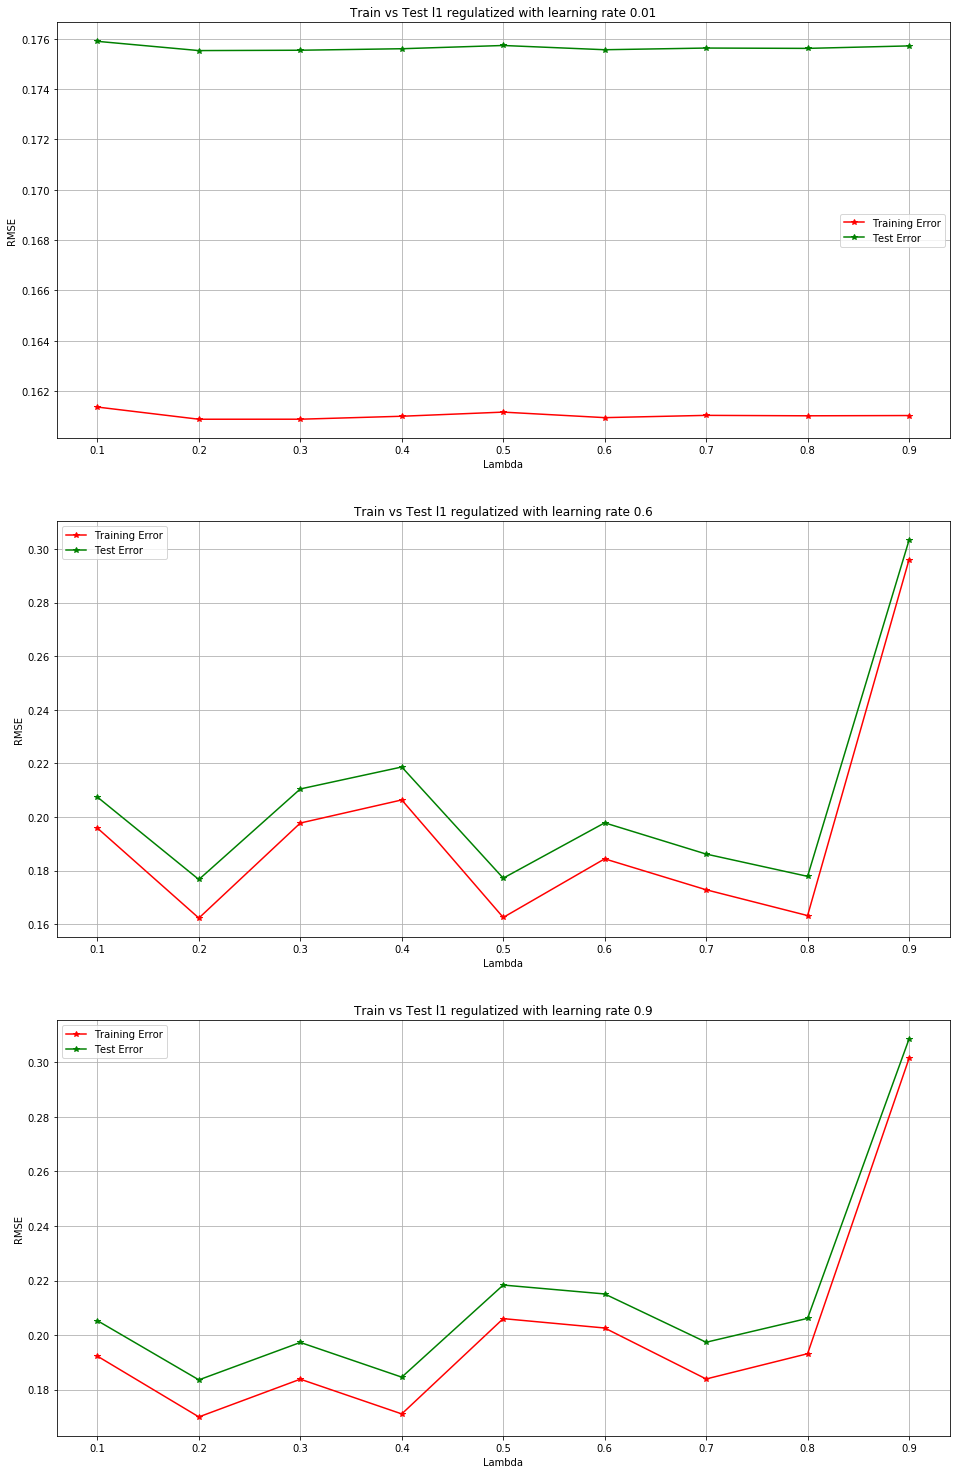

In [621]:
'''
Create samples, create range of hyperparameters, run the loop for the same
plot the RMSE across for test and train data
'''
h_p = (0.01, 0.6, 0.9)
alp = np.arange(0.1, 1, 0.10)
fig,ax = plt.subplots(3,1,figsize=(16,26))
lr_i = 0
for l_r in h_p:
    train_rmse,test_rmse = [],[]
    for ap in alp:
        tr_er,ts_er = run_ridge(train_d2,test_d2,'quality',l_r,ap)
        train_rmse.append(tr_er)
        test_rmse.append(ts_er)
    print(f"Test score with learning rates {l_r} and alpha {alp} is {test_rmse} respectively")
    ax[lr_i].plot(np.array(alp).T,np.array(train_rmse),'-r*')
    ax[lr_i].plot(np.array(alp).T,np.array(test_rmse),'-g*')
    ax[lr_i].grid()
    ax[lr_i].set_xticks(alp)
    ax[lr_i].set_xlabel('Lambda')
    ax[lr_i].set_ylabel('RMSE')
    ax[lr_i].set_title(f"Train vs Test l1 regulatized with learning rate {np.around(l_r,decimals=2)}")
    ax[lr_i].legend(["Training Error","Test Error"])
    lr_i +=1 
#ax.legend['Training','Test']

### ElasticNet using the combination of both l1 and l2. 

#### Behaviour in case of L2 regularizer is same as in L1, however the RMSE in case of L2 is slightly smaller than L1, this could be due to the nature of L1, which chooses to drop few columns based on sparsity due to it's L1 norm nature.

### Regualrized vs Unregularized:
#### - In case of normal least square regression, we can see our model yields test error higher than the train error, this can be attributed to overfitting where in our model learns the noise of the data rather than the pattern, and becomes very rigid to the train data and insensitive to test data
#### - In case of regualrized model, we observe that as we increase the lambda value(degree of regualrization)  our RMSE value starts to increase. At a high degree of regularization, our model becomes highly penalized for each parameter, and hence avoids learning them causing the model to be underfit, whereas keeping a very low value of lambda, does not contribute much to the regualrization causing the model to become overfit.
#### The gap between the test and train curve reveals this notion of overfitting and underfitting

### Use GridSearch for best Hyperparameter

In [652]:
train_d2= d2.sample(frac=0.8,random_state=4)
test_d2=d2.sample(frac=0.2,random_state=4)

#### Least Square model unregularized

--Summary--
Best parameters {'eta0': 0.21999999999999995}
Best score -4.8198167338341605e+28
Best model SGDRegressor(alpha=0.0001, average=False, epsilon=0.1,
       eta0=0.21999999999999995, fit_intercept=True, l1_ratio=0.15,
       learning_rate='constant', loss='squared_loss', max_iter=100000,
       n_iter=None, penalty='none', power_t=0.25, random_state=None,
       shuffle=True, tol=1e-07, verbose=0, warm_start=False)


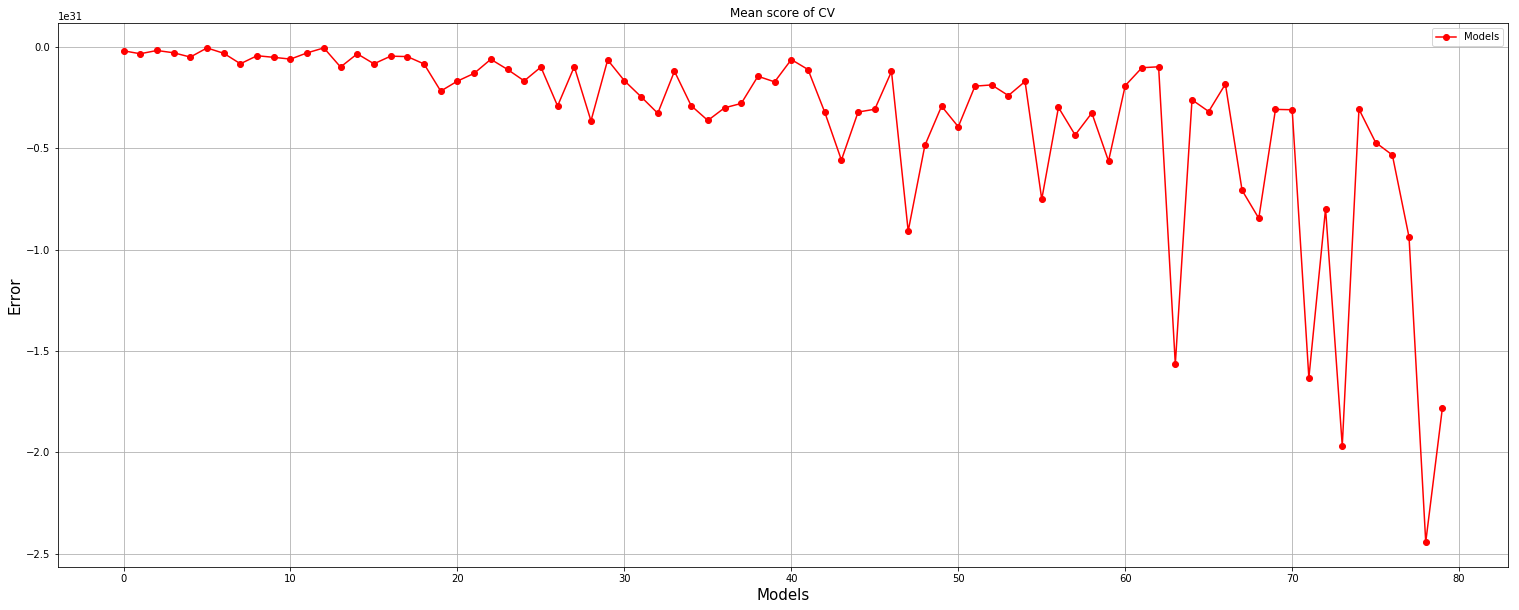

In [582]:
'''
Create a dictionary of parameters, get an estimator object using GridSearch, and plot the CV scores
across all models
'''
parameters = {'eta0':np.arange(0.1, 0.9, 0.01)}
lsc = linear_model.SGDRegressor(penalty='none',
                                    fit_intercept=True,tol=1e-7,shuffle=True,
                                    learning_rate='constant',max_iter=100000)
grdSrch_unRegularized = GridSearchCV(lsc, parameters,cv=5)
grdSrch_unRegularized.fit(train_d2.drop('quality', axis=1),train_d2['quality'])
plt.figure(figsize = (26, 10))
plt.title("Mean score of CV")
plt.plot(grdSrch_unRegularized.cv_results_["mean_test_score"], "-ro", label = "Models")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.grid()
plt.legend()
#plt.xticks(np.arange(0.1, 0.9, 0.01))
print("--Summary--")
print(f"Best parameters {str(grdSrch_unRegularized.best_params_)}")
print(f"Best score {str(grdSrch_unRegularized.best_score_)}")
print(f"Best model {str(grdSrch_unRegularized.best_estimator_)}")


### L1 Regularization 

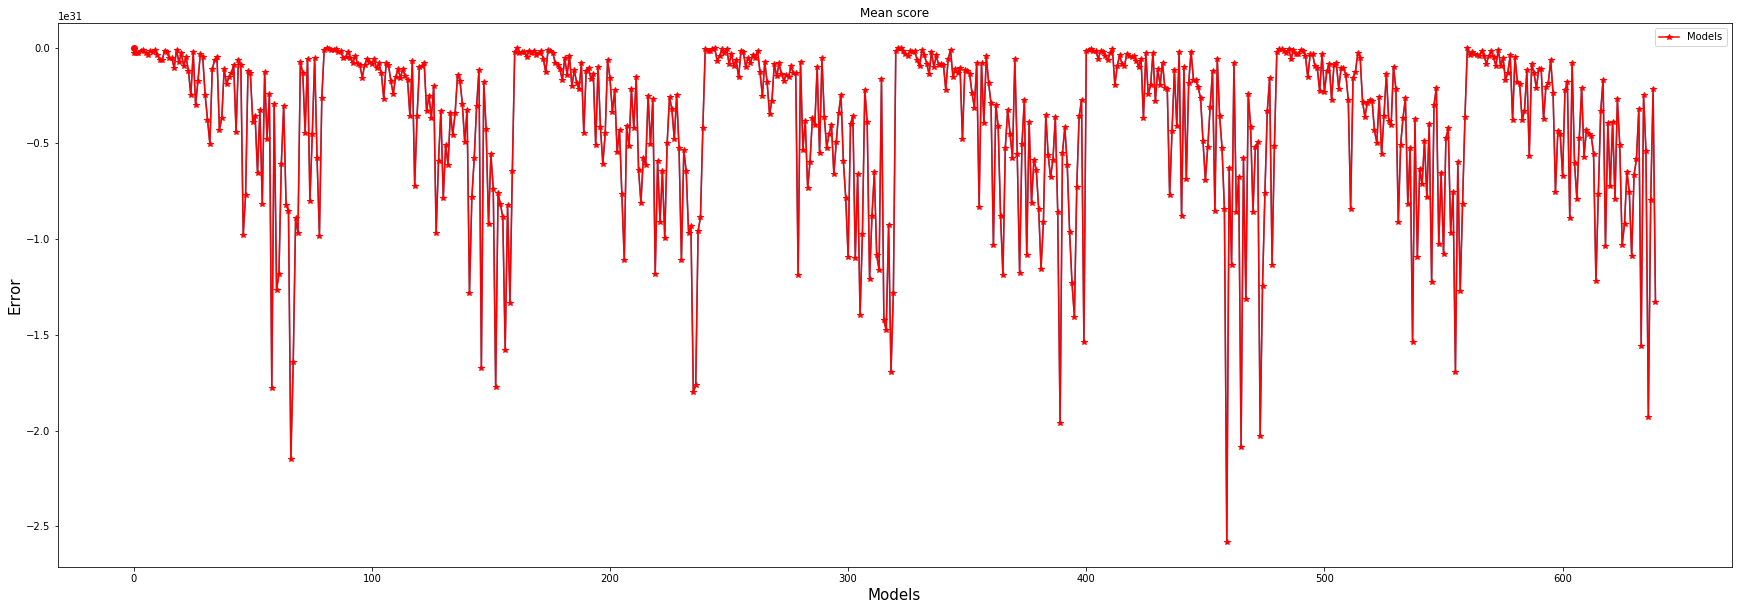

--Summary--
Best parameters {'alpha': 0.2, 'eta0': 0.11}
Best score -9.798986770138489e+27
Best model SGDRegressor(alpha=0.2, average=False, epsilon=0.1, eta0=0.11,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l1',
       power_t=0.25, random_state=None, shuffle=True, tol=1e-07, verbose=0,
       warm_start=False)


In [584]:
'''
Create a dictionary of parameters, get an estimator object using GridSearch, and plot the CV scores
across all models
'''
parameters = {'eta0':np.arange(0.1, 0.9, 0.01),'alpha':np.arange(0.1, 0.9, 0.1)}
rdg = linear_model.SGDRegressor(loss='squared_loss',penalty='l1',
                                    fit_intercept=True,tol=1e-7,shuffle=True,
                                    learning_rate='constant',max_iter=100000)
grdSrc_l1 = GridSearchCV(rdg, parameters,cv=5,return_train_score=True)
grdSrc_l1.fit(train_d2.drop('quality', axis=1),train_d2['quality'])
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(grdSrc_l1.cv_results_["mean_test_score"])
plt.plot(grdSrc_l1.cv_results_["mean_test_score"], "-r*", label = "Models")
plt.plot(grdSrc_l1.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()
#plt.xticks(np.arange(0.1, 0.9, 0.01))
print("--Summary--")
print(f"Best parameters {str(grdSrc_l1.best_params_)}")
print(f"Best score {str(grdSrc_l1.best_score_)}")
print(f"Best model {str(grdSrc_l1.best_estimator_)}")

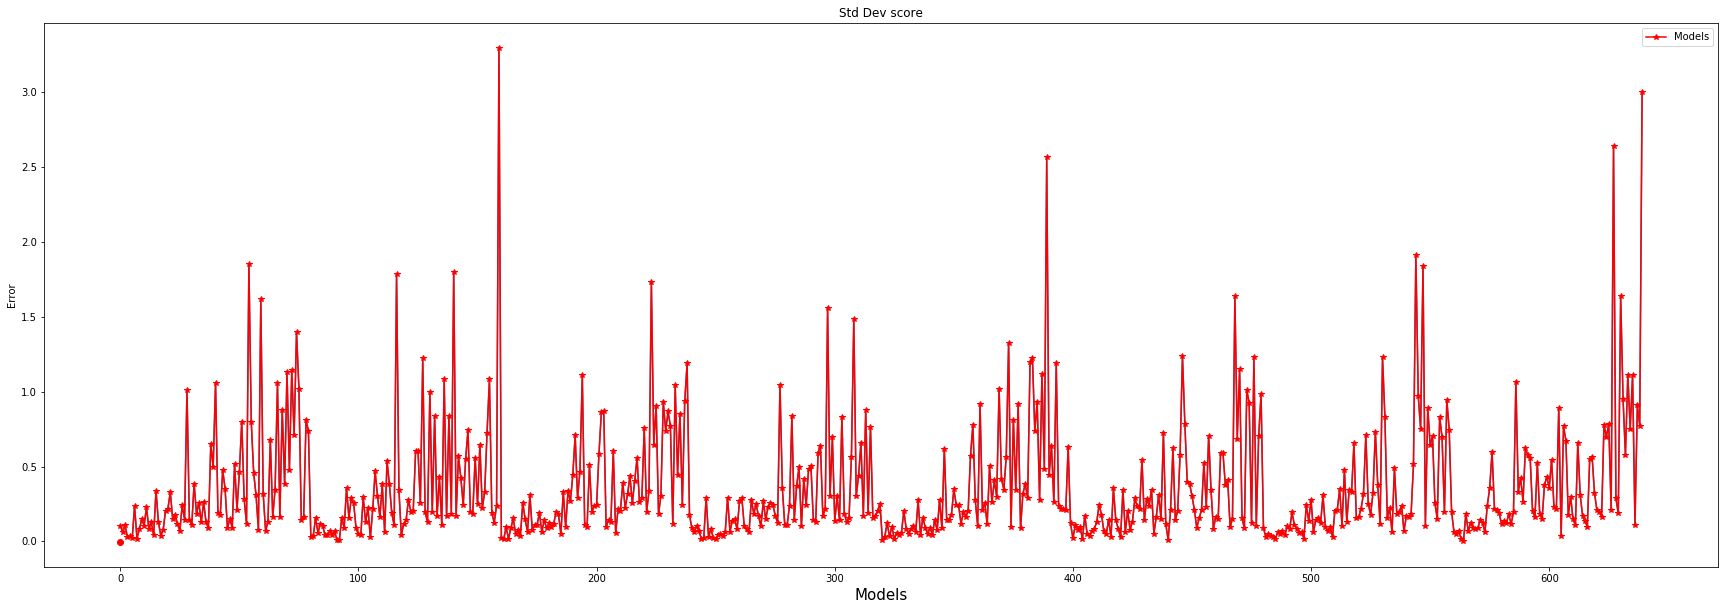

In [583]:
'''
Plotting the CV SD scores as well
'''
plt.figure(figsize = (30, 10))
plt.title("Std Dev score")
plt.plot(grdSrc_l1.cv_results_["std_test_score"])
plt.plot(grdSrc_l1.cv_results_["std_test_score"], "-r*", label = "Models")
plt.plot(grdSrc_l1.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error')
plt.legend()
plt.show()

### L2 regularization

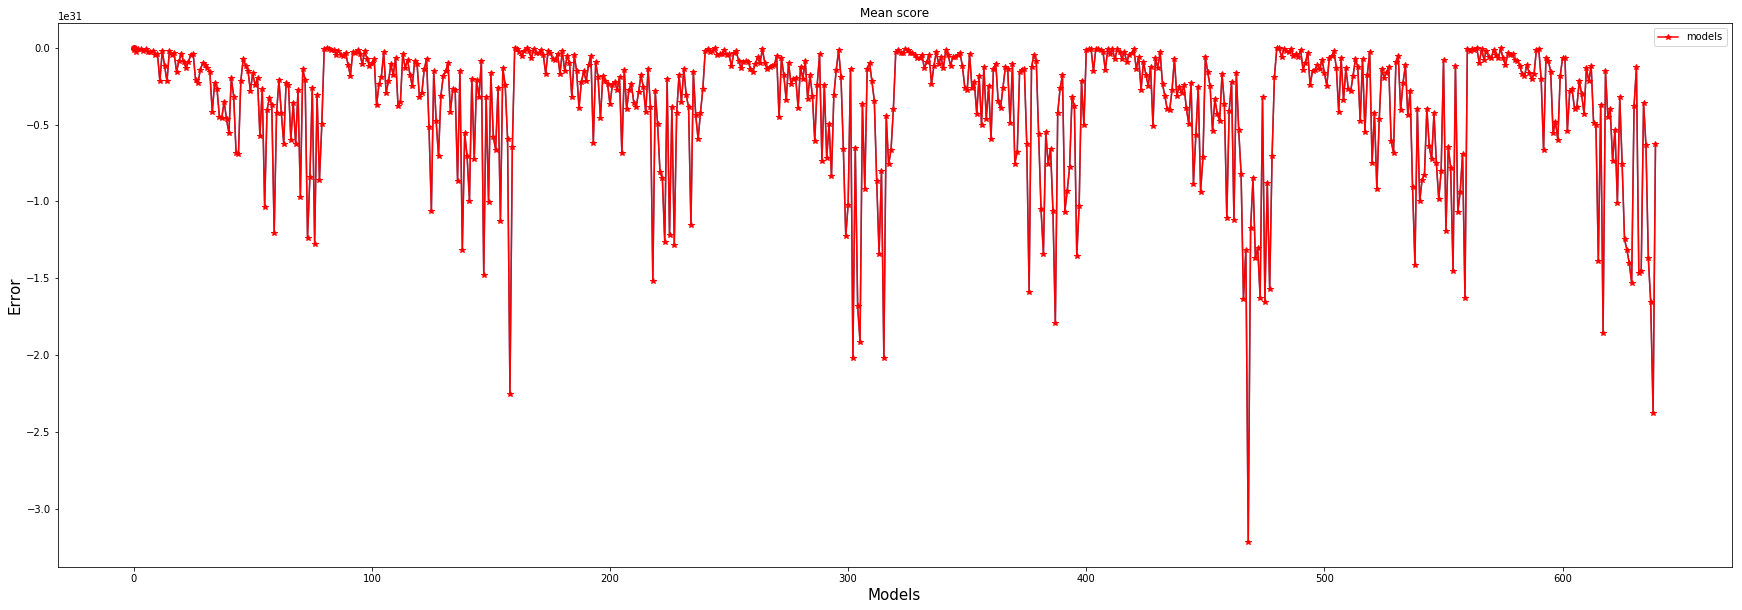

--Summary--
Best parameters {'alpha': 0.4, 'eta0': 0.13999999999999999}
Best score -1.5503646062980556e+28
Best model SGDRegressor(alpha=0.4, average=False, epsilon=0.1, eta0=0.13999999999999999,
       fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
       loss='squared_loss', max_iter=100000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=1e-07, verbose=0,
       warm_start=False)


In [587]:
'''
Create a dictionary of parameters, get an estimator object using GridSearch, and plot the CV scores
across all models
'''
parameters = {'eta0':np.arange(0.1, 0.9, 0.01),'alpha':np.arange(0.1, 0.9, 0.1)}
lss = linear_model.SGDRegressor(loss='squared_loss',penalty='l2',
                                    fit_intercept=True,tol=1e-7,shuffle=True,
                                    learning_rate='constant',max_iter=100000)
grdSrc_l2 = GridSearchCV(lss, parameters,cv=5,return_train_score=True)
grdSrc_l2.fit(train_d2.drop('quality', axis=1),train_d2['quality'])
plt.figure(figsize = (30, 10))
plt.title("Mean score")
plt.plot(grdSrc_l2.cv_results_["mean_test_score"])
plt.plot(grdSrc_l2.cv_results_["mean_test_score"], "-r*", label = "models")
plt.plot(grdSrc_l2.best_score_, "ro")
plt.xlabel('Models')
plt.ylabel('Error')
plt.legend()
plt.show()
#plt.xticks(np.arange(0.1, 0.9, 0.01))
print("--Summary--")
print(f"Best parameters {str(grdSrc_l2.best_params_)}")
print(f"Best score {str(grdSrc_l2.best_score_)}")
print(f"Best model {str(grdSrc_l2.best_estimator_)}")

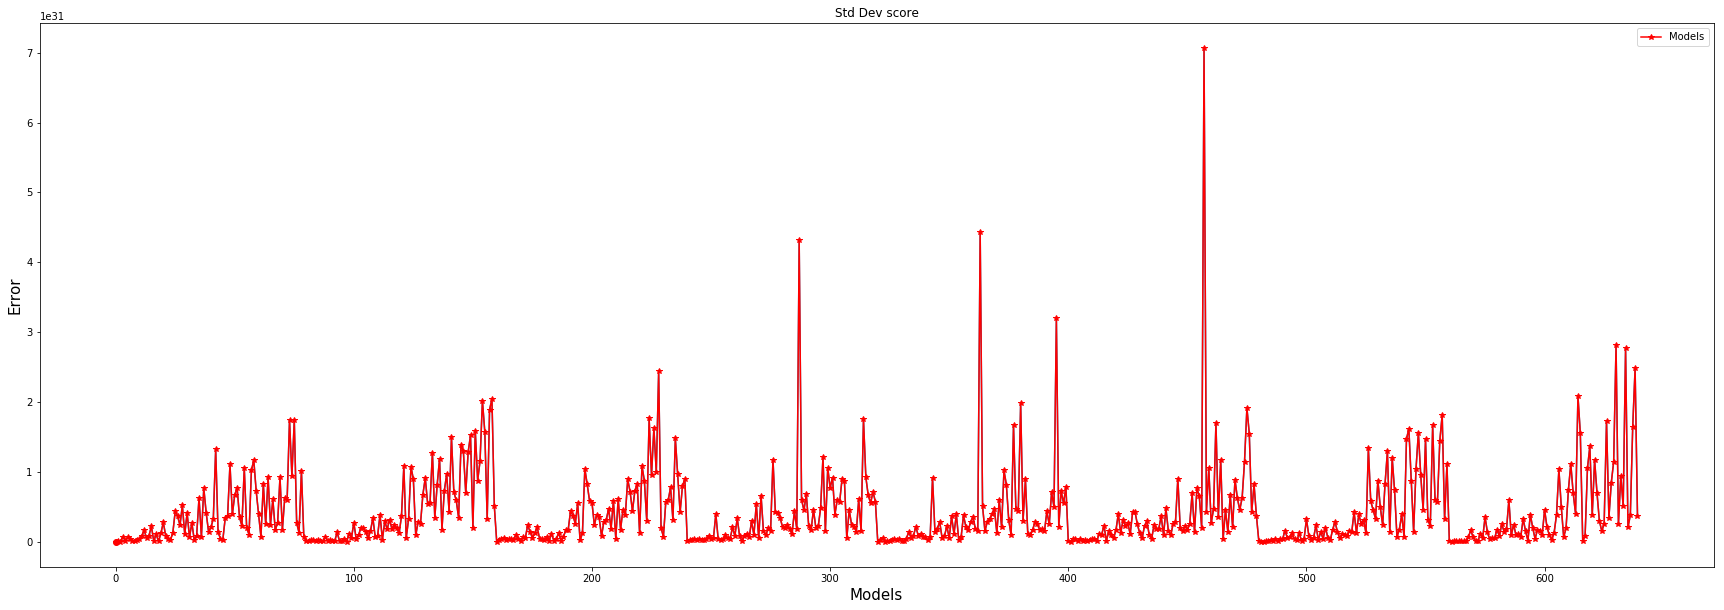

In [586]:
'''
Plotting the CV SD scores as well
'''
plt.figure(figsize = (30, 10))
plt.title("Std Dev score")
plt.plot(grdSrc_l2.cv_results_["std_test_score"])
plt.plot(grdSrc_l2.cv_results_["std_test_score"], "-r*", label = "Models")
plt.plot(grdSrc_l2.best_score_, "ro")
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Error', fontsize = 15)
plt.legend()
plt.show()

#### Create box plots using the cross_val_score function 

Text(0.5,1,'CV scores for unregularized,l1 and l2 model')

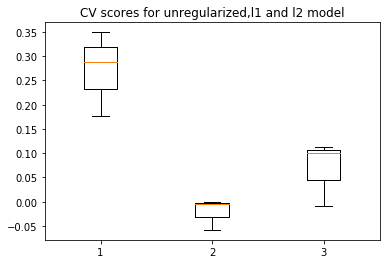

In [552]:
from sklearn.model_selection import cross_val_score
scNR = cross_val_score(grdSrch_unRegularized.best_estimator_,train_d2.drop('quality', axis=1),train_d2['quality'])
scL1 = cross_val_score(grdSrc_l1.best_estimator_,train_d2.drop('quality', axis=1),train_d2['quality'])
scL2 = cross_val_score(grdSrc_l2.best_estimator_,train_d2.drop('quality', axis=1),train_d2['quality'])


plt.boxplot([scNR,scL1, scL2])
plt.title("CV scores for unregularized,l1 and l2 model")

- The median value of the CV scores in case of L1 is the lowest, indicating that it provides a better performance, along with the lowest range of error values across all folds.
- Since L1 also performs the parameter selection during regualrization, it generally performs better than other regualrization stratergies

### Polynomial Features

### Varying the degree of the predicted function

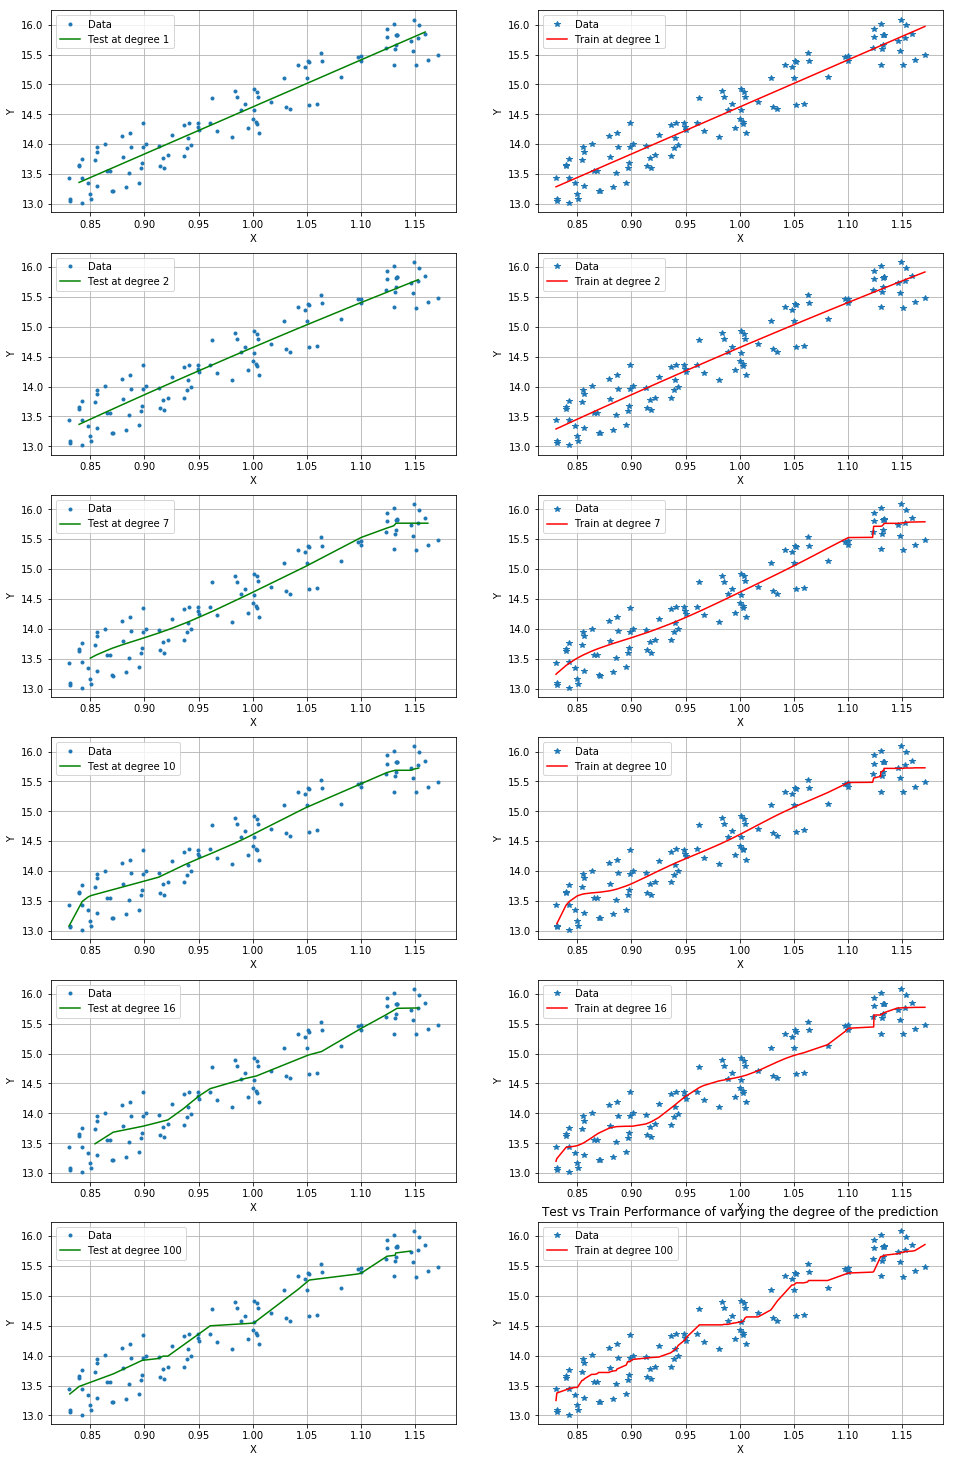

In [655]:
def predictPolyLinear(degree):
    '''
    Produce polynomimal expressions of the data
    '''
    poly = PolynomialFeatures(degree)
    d12 = poly.fit_transform(np.array(d1['X']).reshape(-1, 1))
    indices = np.arange(0,100,1)
    np.random.shuffle(indices)
    train_d1 = d12[indices[:80]]
    train_d1_y = d1['Y'].iloc[indices[:80]]
    test_d1 = d12[indices[80:]]
    test_d1_y = d1['Y'].iloc[indices[80:]]
    rgr = linear_model.LinearRegression(normalize=True) #least square measure
    rgr = rgr.fit(train_d1,train_d1_y)
    y_pred = rgr.predict(test_d1)
    y_pred_train = rgr.predict(train_d1)
    train_error = np.sqrt(mean_squared_error(train_d1_y, y_pred_train))
    test_error = np.sqrt(mean_squared_error(test_d1_y, y_pred))
    return train_error,test_error,np.sort(d1['X'].iloc[indices[80:]]),np.sort(d1['X'].iloc[indices[:80]]),np.sort(y_pred_train),np.sort(y_pred)


fig,ax = plt.subplots(6,2,figsize=(16,26))
plt.title("Test vs Train Performance of varying the degree of the prediction")
plt_ind=0
rmse_train = {}
rmse_test = {}
for i in list([1,2,7,10,16,100]):
    train_error,test_error,test_x,train_x,pred_train_y, pred_y = predictPolyLinear(i)
    ax[plt_ind][0].plot(d1['X'],d1['Y'],'.',test_x, pred_y,'-g')
    ax[plt_ind][1].plot(d1['X'],d1['Y'],'*',train_x, pred_train_y,'-r')
    ax[plt_ind][0].grid()
    ax[plt_ind][0].set_xlabel('X')
    ax[plt_ind][0].set_ylabel('Y')
    ax[plt_ind][0].legend(['Data','Test at degree '+str(i)])
    ax[plt_ind][1].grid()
    ax[plt_ind][1].set_xlabel('X')
    ax[plt_ind][1].set_ylabel('Y')
    ax[plt_ind][1].legend(['Data','Train at degree '+str(i)])
    rmse_train[i]=train_error
    rmse_test[i]=test_error
    plt_ind+=1


#### As the degree of the function is increased the function becomes more complex and tries to produce a non linear curve for fitting, this curve curls and adjust more to the datapoints and we further increase the degree of the polynomial

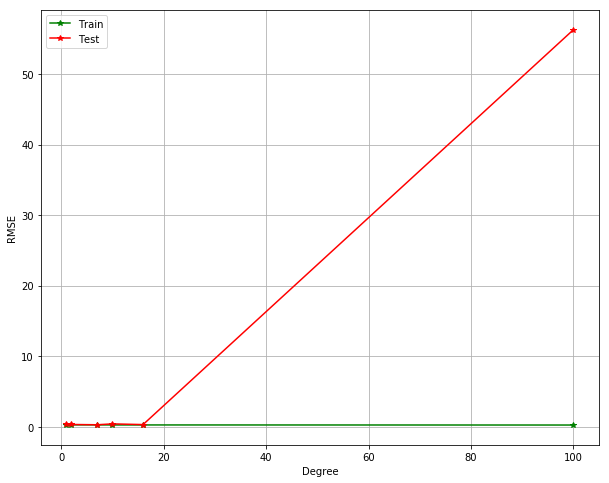

In [637]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(list(rmse_train.keys()),list(rmse_train.values()),'-g*')
ax.plot(list(rmse_test.keys()),list(rmse_test.values()),'-r*')
ax.grid()
#ax.set_xticks(list(rmse_test.keys()))
ax.set_xlabel('Degree')
ax.set_ylabel('RMSE')
ax.legend(['Train','Test'])

### We can clearly see that our model after certain degrees, becomes rigid and starts to overfit causing huge difference in the test and train error

### Fixed Degree on L2 varying the lambda

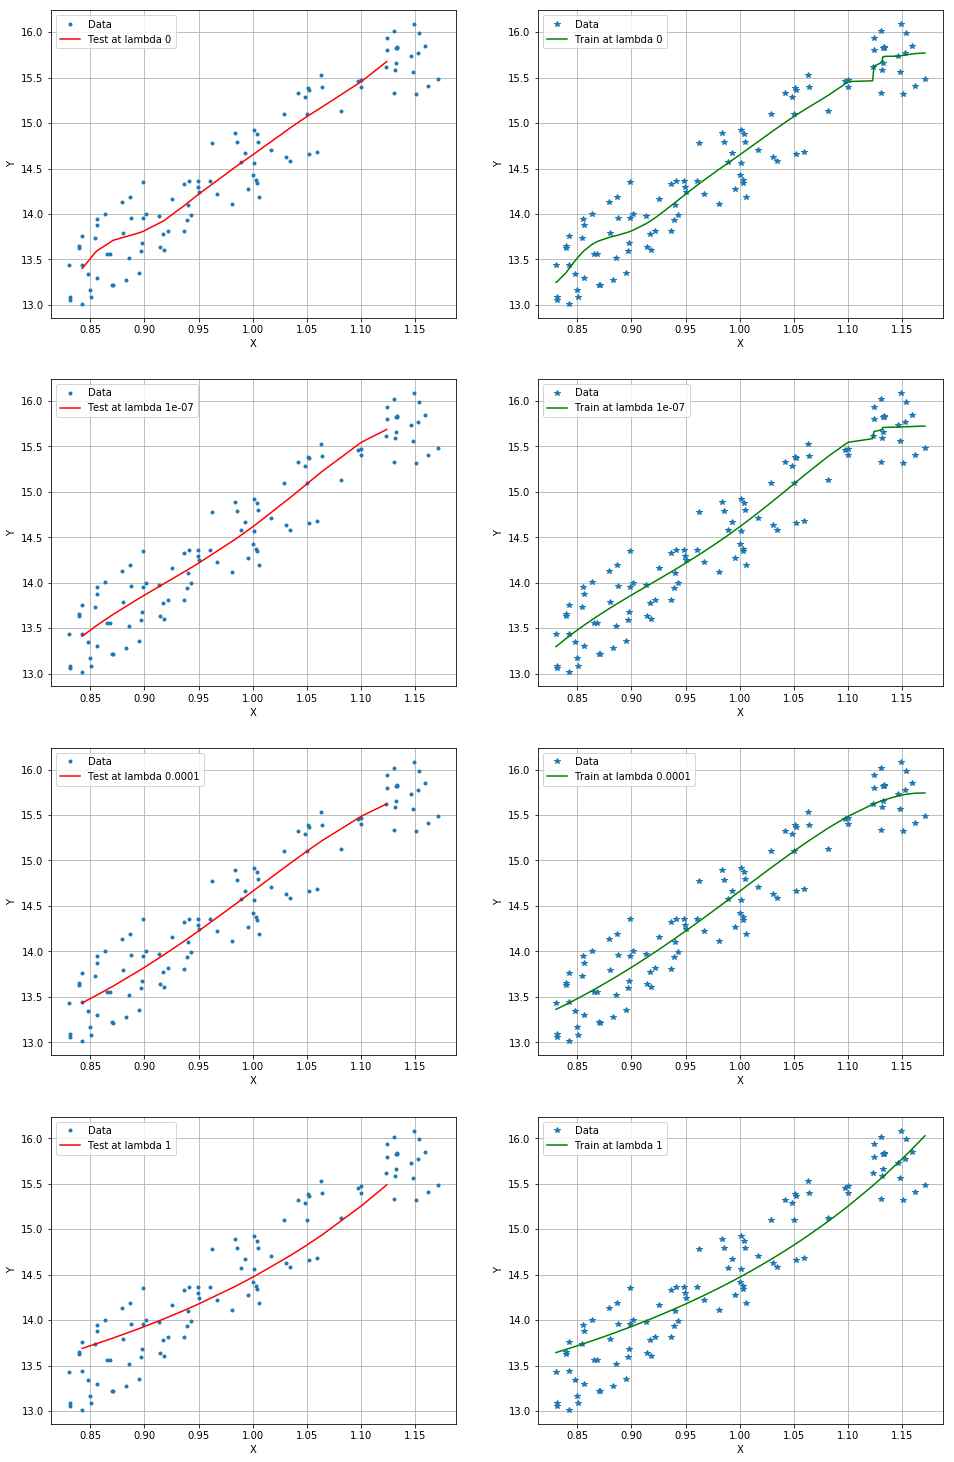

In [641]:
poly = PolynomialFeatures(10)
d10 = poly.fit_transform(np.array(d1['X']).reshape(-1, 1))
indices = np.arange(0,100,1)
np.random.shuffle(indices)
train_d1 = d10[indices[:80]]
train_d1_y = d1['Y'].iloc[indices[:80]]
test_d1 = d10[indices[80:]]
test_d1_y = d1['Y'].iloc[indices[80:]]
fig,ax = plt.subplots(4,2,figsize=(16,26))
plt_ind=0
rmse_train = {}
rmse_test = {}
for alp in list([0,1e-7,1e-4,1]):
    rgr = linear_model.Ridge(alpha=alp,normalize=True) #least square measure
    rgr.fit(train_d1,train_d1_y)
    y_pred= rgr.predict(test_d1)
    y_pred_train= rgr.predict(train_d1)
    train_error = np.sqrt(mean_squared_error(train_d1_y, y_pred_train))
    test_error = np.sqrt(mean_squared_error(test_d1_y, y_pred))
    ax[plt_ind][0].plot(d1['X'],d1['Y'],'.',np.sort(d1['X'].iloc[indices[80:]]),np.sort(y_pred),'-r',label = "Ridge regression on test set ")
    ax[plt_ind][1].plot(d1['X'],d1['Y'],'*',np.sort(d1['X'].iloc[indices[:80]]),np.sort(y_pred_train),'-g',label = "Ridge regression on train set ")
    ax[plt_ind][0].grid()
    ax[plt_ind][0].set_xlabel('X')
    ax[plt_ind][0].set_ylabel('Y')
    ax[plt_ind][0].legend(['Data','Test at lambda '+str(alp)])
    ax[plt_ind][1].grid()
    ax[plt_ind][1].set_xlabel('X')
    ax[plt_ind][1].set_ylabel('Y')
    ax[plt_ind][1].legend(['Data','Train at lambda '+str(alp)])
    rmse_train[alp]=train_error
    rmse_test[alp]=test_error
    plt_ind+=1


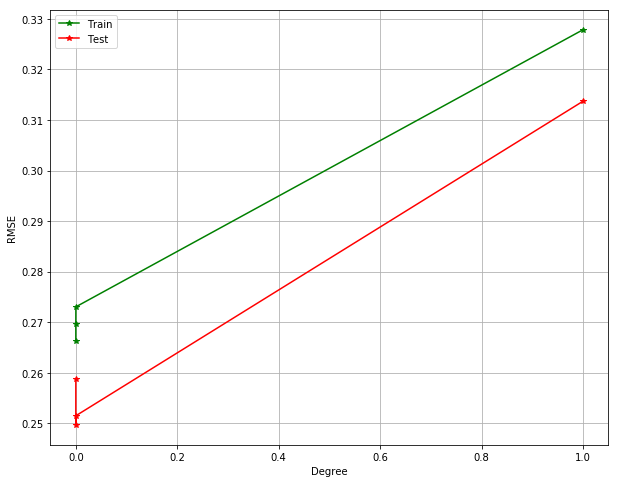

In [645]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(list(rmse_train.keys()),list(rmse_train.values()),'-g*')
ax.plot(list(rmse_test.keys()),list(rmse_test.values()),'-r*')
ax.grid()
#ax.set_xticks(list(rmse_test.keys()))
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE')
ax.legend(['Train','Test'])

#### This RMSE plot shows that as we increase the lambda values, our model becomes underfitted, indicated by the increasing values in the RMSE of both test and train set

#### Fixed degree on L1

C:\Users\Anurag\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  from ipykernel import kernelapp as app
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Anurag\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)

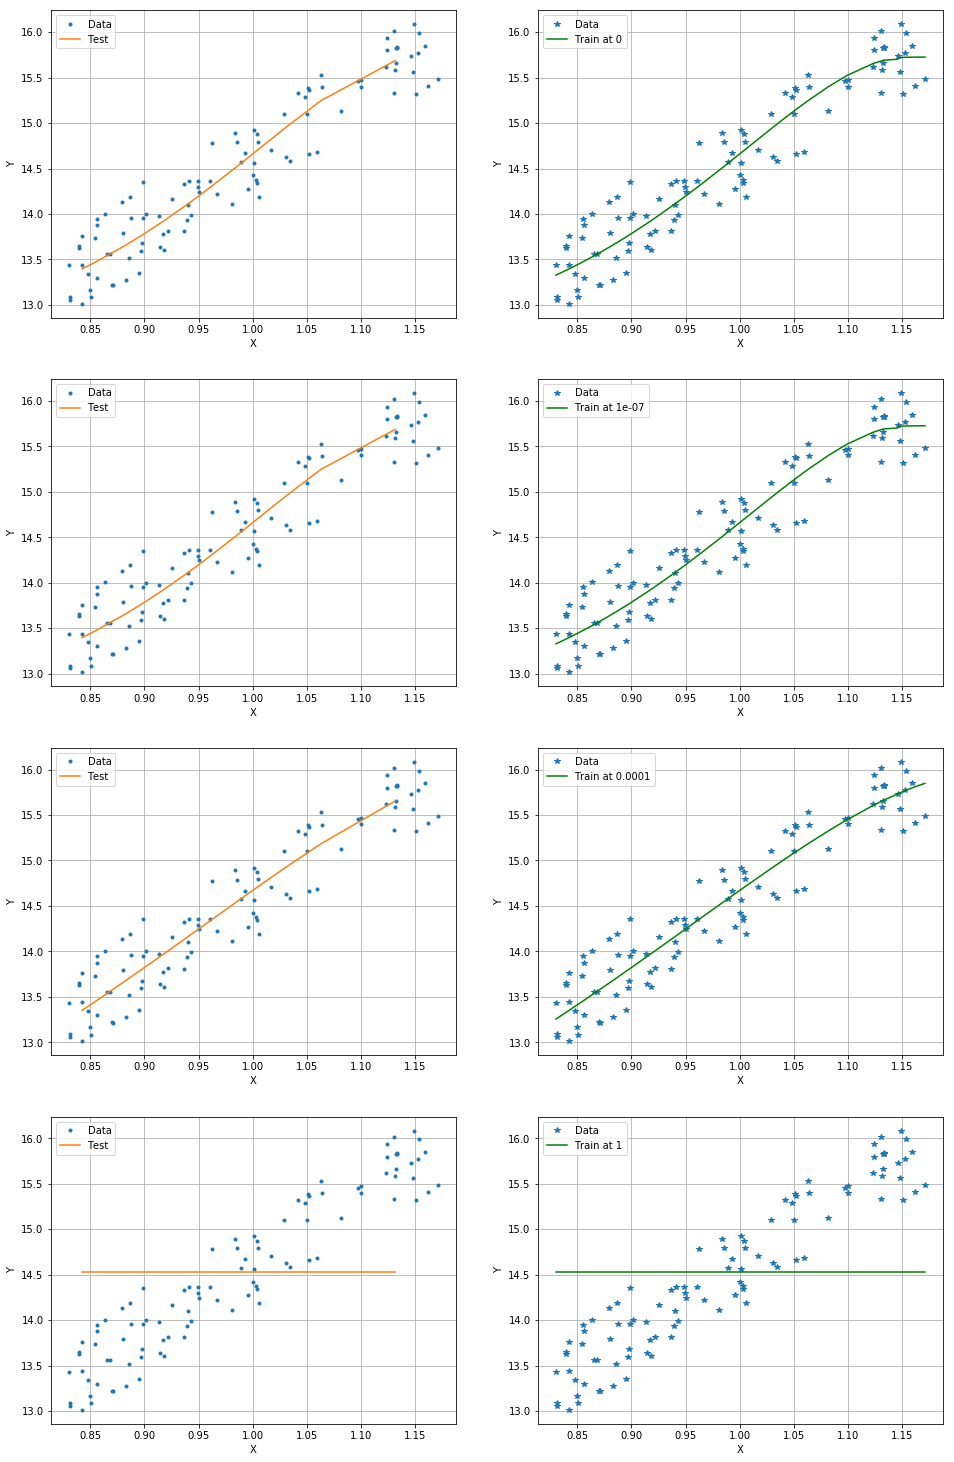

In [648]:
poly = PolynomialFeatures(10)
dL = poly.fit_transform(np.array(d1['X']).reshape(-1, 1))
indices = np.arange(0,100,1)
np.random.shuffle(indices)
train_d1 = dL[indices[:80]]
train_d1_y = d1['Y'].iloc[indices[:80]]
test_d1 = dL[indices[80:]]
test_d1_y = d1['Y'].iloc[indices[80:]]
fig,ax = plt.subplots(4,2,figsize=(16,26))
plt_ind=0
rmse_train = {}
rmse_test = {}
for alp in list([0,1e-7,1e-4,1]):
    rgr = linear_model.Lasso(alpha=alp,max_iter=50000,normalize=True) #least square measure
    rgr.fit(train_d1,train_d1_y)
    y_pred= rgr.predict(test_d1)
    y_pred_train= rgr.predict(train_d1)
    train_error = np.sqrt(mean_squared_error(train_d1_y, y_pred_train))
    test_error = np.sqrt(mean_squared_error(test_d1_y, y_pred))
    ax[plt_ind][0].plot(d1['X'],d1['Y'],'.',np.sort(d1['X'].iloc[indices[80:]]),np.sort(y_pred),'-')
    ax[plt_ind][1].plot(d1['X'],d1['Y'],'*',np.sort(d1['X'].iloc[indices[:80]]),np.sort(y_pred_train),'-g')
    ax[plt_ind][0].grid()
    ax[plt_ind][0].set_xlabel('X')
    ax[plt_ind][0].set_ylabel('Y')
    ax[plt_ind][0].legend(['Data','Test'])
    ax[plt_ind][1].grid()
    ax[plt_ind][1].set_xlabel('X')
    ax[plt_ind][1].set_ylabel('Y')
    ax[plt_ind][1].legend(['Data','Train at '+str(alp)])
    rmse_train[alp]=train_error
    rmse_test[alp]=test_error
    plt_ind+=1


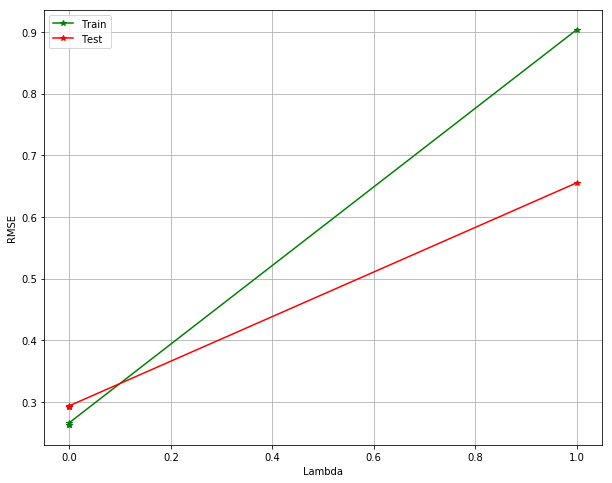

In [649]:
fig,ax = plt.subplots(figsize=(10,8))
ax.plot(list(rmse_train.keys()),list(rmse_train.values()),'-g*')
ax.plot(list(rmse_test.keys()),list(rmse_test.values()),'-r*')
ax.grid()
#ax.set_xticks(list(rmse_test.keys()))
ax.set_xlabel('Lambda')
ax.set_ylabel('RMSE')
ax.legend(['Train','Test'])

#### We can observe a similar trend in L1 regualrization as well, in case of which there is a huge increase in the error, (more than ridge), this affirms that our model turn overfitted as we increase the regularization parameter